In [1]:
import cvxpy as cp
import numpy as np
import dccp
import numpy.typing as npt
from enum import Enum
from multireward_ope.tabular.mdp import MDP
from multireward_ope.tabular.characteristic_time import CharacteristicTimeSolver
from multireward_ope.tabular.reward_set import RewardSet, RewardSetCircle, RewardSetType, RewardSetRewardFree, RewardSetBox
from typing import NamedTuple


mdp = MDP.generate_random_mdp(3, 2)
policy = np.array([0, 1, 0], dtype=np.long)
rewards = RewardSetCircle(mdp.dim_state, np.zeros(mdp.dim_state), radius=1, p=2)
rbox = RewardSetBox(mdp.dim_state, np.zeros(mdp.dim_state), np.ones(mdp.dim_state))
rfree = RewardSetRewardFree(mdp.dim_state)
solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action)
solver.build_problem(rewards)

print(solver.solve(0.9, mdp, policy))

solver.build_problem(rfree)
print(solver.solve(0.9, mdp, policy))

solver.build_problem(rbox)
print(solver.solve(0.9, mdp, policy))
        


BoundResult(value=2.893645231711979, w=array([[2.57431217e-01, 6.41352227e-09],
       [0.00000000e+00, 2.75790028e-01],
       [3.54239946e-01, 1.12538809e-01]]))
BoundResult(value=2.893645240304091, w=array([[2.57431217e-01, 6.41306443e-09],
       [0.00000000e+00, 2.75790028e-01],
       [3.54239947e-01, 1.12538809e-01]]))
BoundResult(value=2.893645210348486, w=array([[2.57431217e-01, 6.45634986e-09],
       [0.00000000e+00, 2.75790028e-01],
       [3.54239947e-01, 1.12538809e-01]]))


Text(0, 0.5, 'Characteristic time $T^\\star$')

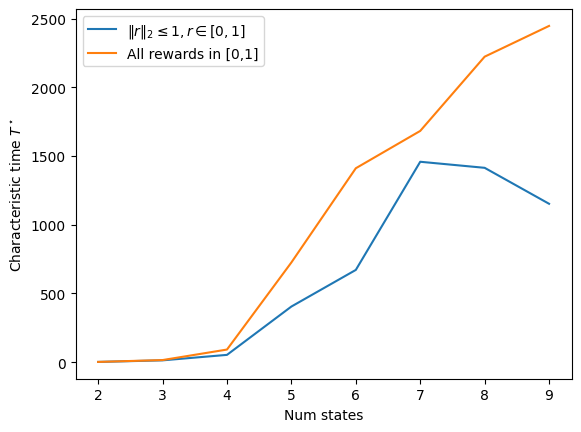

In [13]:
from multireward_ope.tabular.envs.riverswim import RiverSwim
import matplotlib.pyplot as plt


results_circle = []
results_rfree = []
for s in range(2, 10):
    mdp = RiverSwim(s)
    policy = np.random.choice([0,1], size=mdp.dim_state)
    rewards = RewardSetCircle(mdp.dim_state, np.zeros(mdp.dim_state), radius=1, p=2)
    rbox = RewardSetBox(mdp.dim_state, np.zeros(mdp.dim_state), np.ones(mdp.dim_state))
    rfree = RewardSetRewardFree(mdp.dim_state)
    solver = CharacteristicTimeSolver(mdp.dim_state, mdp.dim_action)
    solver.build_problem(rewards)
    results_circle.append(solver.solve(0.9, mdp, policy).value)

    solver.build_problem(rfree)
    results_rfree.append(solver.solve(0.9, mdp, policy).value)

plt.plot(range(2,10), results_circle, label='$\|r\|_2 \leq 1, r\in [0,1]$')
plt.plot(range(2,10), results_rfree, label='All rewards in [0,1]')
plt.legend()
plt.xlabel('Num states')
plt.ylabel('Characteristic time $T^\star$')